In [1]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

In [2]:

# Using built-in MovieLens 100k dataset
data = Dataset.load_builtin('ml-100k')

In [3]:
import pandas as pd

# Movie metadata (movie ID, title, etc.)
item_df = pd.read_csv(
    'https://files.grouplens.org/datasets/movielens/ml-100k/u.item',
    sep='|',
    encoding='latin-1',
    header=None,
    names=["movie_id", "title", "release_date", "video_release_date", "IMDb_URL"] + [f"genre_{i}" for i in range(19)]
)

item_df = item_df[['movie_id', 'title']]
item_df['movie_id'] = item_df['movie_id'].astype(str)  # Match Surprise IDs

In [4]:
trainset, testset = train_test_split(data, test_size=0.2)

In [5]:
from surprise import SVD
from surprise import accuracy

model = SVD()
model.fit(trainset)
predictions = model.test(testset)

In [6]:
# Root Mean Squared Error
rmse = accuracy.rmse(predictions)

RMSE: 0.9439


In [7]:
from collections import defaultdict

# Function to get top-N recommendations for each user
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Sort the predictions for each user and get the top n
    for uid, user_ratings in top_n.items():
        top_n[uid] = sorted(user_ratings, key=lambda x: x[1], reverse=True)[:n]
    return top_n

top_n = get_top_n(predictions, n=5)

# Display recommendations for first 5 users
for uid, user_ratings in list(top_n.items())[:5]:
    print(f"\nUser {uid} - Recommended items: {[iid for iid, _ in user_ratings]}")


User 901 - Recommended items: ['22', '95', '210', '520', '144']

User 373 - Recommended items: ['64', '318', '170', '114', '494']

User 566 - Recommended items: ['127', '483', '100', '136', '467']

User 509 - Recommended items: ['50', '705', '754', '271', '326']

User 886 - Recommended items: ['496', '181', '173', '89', '69']


In [8]:
# Show titles instead of item IDs
for uid, user_ratings in list(top_n.items())[:5]:
    print(f"\nUser {uid} - Recommended Movies:")
    for iid, rating in user_ratings:
        movie_title = item_df[item_df['movie_id'] == iid]['title'].values[0]
        print(f"  {movie_title} (predicted rating: {rating:.2f})")



User 901 - Recommended Movies:
  Braveheart (1995) (predicted rating: 4.89)
  Aladdin (1992) (predicted rating: 4.57)
  Indiana Jones and the Last Crusade (1989) (predicted rating: 4.54)
  Great Escape, The (1963) (predicted rating: 4.49)
  Die Hard (1988) (predicted rating: 4.47)

User 373 - Recommended Movies:
  Shawshank Redemption, The (1994) (predicted rating: 4.72)
  Schindler's List (1993) (predicted rating: 4.59)
  Cinema Paradiso (1988) (predicted rating: 4.44)
  Wallace & Gromit: The Best of Aardman Animation (1996) (predicted rating: 4.42)
  His Girl Friday (1940) (predicted rating: 4.35)

User 566 - Recommended Movies:
  Godfather, The (1972) (predicted rating: 4.24)
  Casablanca (1942) (predicted rating: 4.07)
  Fargo (1996) (predicted rating: 4.06)
  Mr. Smith Goes to Washington (1939) (predicted rating: 3.91)
  Bronx Tale, A (1993) (predicted rating: 3.86)

User 509 - Recommended Movies:
  Star Wars (1977) (predicted rating: 3.61)
  Singin' in the Rain (1952) (predicted

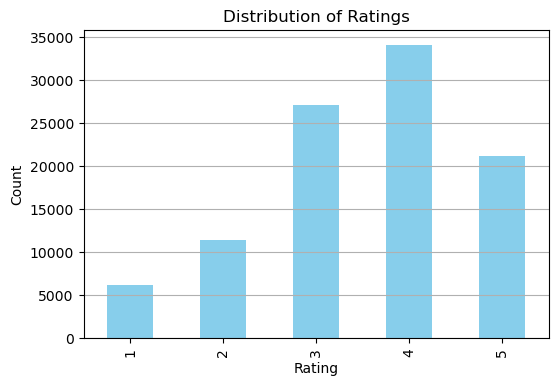

In [9]:
import matplotlib.pyplot as plt

# Load full rating data
rating_df = pd.read_csv(
    'https://files.grouplens.org/datasets/movielens/ml-100k/u.data',
    sep='\t',
    names=['user_id', 'item_id', 'rating', 'timestamp'],
    engine='python'
)

plt.figure(figsize=(6,4))
rating_df['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True, axis='y')
plt.show()

In [10]:
from surprise import KNNBasic

# Item-based CF
sim_options = {
    'name': 'cosine',
    'user_based': False  # Set to True for user-user
}

knn_model = KNNBasic(sim_options=sim_options)
knn_model.fit(trainset)
knn_predictions = knn_model.test(testset)
accuracy.rmse(knn_predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0387


1.0387313051268483

In [13]:
from collections import defaultdict

# Function to get top-N recommendations for each user
def get_top_n(knn_predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in knn_predictions:
        top_n[uid].append((iid, est))

    # Sort the predictions for each user and get the top n
    for uid, user_ratings in top_n.items():
        top_n[uid] = sorted(user_ratings, key=lambda x: x[1], reverse=True)[:n]
    return top_n

top_n = get_top_n(knn_predictions, n=5)

# Display recommendations for first 5 users
for uid, user_ratings in list(top_n.items())[:5]:
    print(f"\nUser {uid} - Recommended items: {[iid for iid, _ in user_ratings]}")


User 901 - Recommended items: ['181', '22', '144', '161', '402']

User 373 - Recommended items: ['64', '393', '318', '588', '70']

User 566 - Recommended items: ['100', '127', '273', '136', '170']

User 509 - Recommended items: ['271', '705', '50', '343', '266']

User 886 - Recommended items: ['173', '55', '69', '89', '181']


In [14]:
# Show titles instead of item IDs
for uid, user_ratings in list(top_n.items())[:5]:
    print(f"\nUser {uid} - Recommended Movies:")
    for iid, rating in user_ratings:
        movie_title = item_df[item_df['movie_id'] == iid]['title'].values[0]
        print(f"  {movie_title} (predicted rating: {rating:.2f})")



User 901 - Recommended Movies:
  Return of the Jedi (1983) (predicted rating: 4.43)
  Braveheart (1995) (predicted rating: 4.40)
  Die Hard (1988) (predicted rating: 4.38)
  Top Gun (1986) (predicted rating: 4.38)
  Ghost (1990) (predicted rating: 4.38)

User 373 - Recommended Movies:
  Shawshank Redemption, The (1994) (predicted rating: 4.05)
  Mrs. Doubtfire (1993) (predicted rating: 4.05)
  Schindler's List (1993) (predicted rating: 3.99)
  Beauty and the Beast (1991) (predicted rating: 3.95)
  Four Weddings and a Funeral (1994) (predicted rating: 3.92)

User 566 - Recommended Movies:
  Fargo (1996) (predicted rating: 4.18)
  Godfather, The (1972) (predicted rating: 4.05)
  Heat (1995) (predicted rating: 3.98)
  Mr. Smith Goes to Washington (1939) (predicted rating: 3.85)
  Cinema Paradiso (1988) (predicted rating: 3.83)

User 509 - Recommended Movies:
  Starship Troopers (1997) (predicted rating: 2.45)
  Singin' in the Rain (1952) (predicted rating: 2.45)
  Star Wars (1977) (predi